# Optimising Inventory Management Through Data Analysis and Forecasting
## Part 3 - Analysing the data

## AW(2022) and SS(2023) - Analysis

# Table of Contents

1. [Importing Libraries](#1.-importing-libraries)
2. [Loading the data](#2.-loading-the-data)
3. [Analysis](#3.-analysis)
   - [3.1 Womens Footwear - Trends](#3.1-womens-footwear---trends)
   - [3.2 Mens Footwear - Trends](#3.2-mens-footwear---trends)
   - [3.3 Boys Footwear - Trends](#3.3-boys-footwear---trends)
   - [3.4 Girls Footwear - Trends](#3.4-girls-footwear---trends)

## 1. Importing Libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

## 2. Loading the data

In [66]:
# Loading the dataset
sales_2017_2024_clean = pd.read_csv('sales_2017_2024_clean.csv')

I want to ensure the file is loaded correctly. I will check the first two rows.

In [67]:
sales_2017_2024_clean.head(2)

,Transaction Date,Branch Name,Product Description,Product Category,Product Subcategory,Brand Name,Season Collection,Style Code,Product Size,Product Color,...,Original Price (incl. VAT),Discount,Revenue (incl. VAT),Revenue (excl. VAT),VAT Amount,Cost Price (excl. VAT),Gross Profit,Profit Margin (%),Markup,Online Sale
0,13/03/2017 13:13:40,Barnes,17 Anamarie Essay,Womens Shoes,Leather Pumps (WDG),Peter Kaiser,(2017) SS,17 Anamarie Essay,5,Whitegold,...,125.0,-6.25,118.75,98.96,19.79,45.9,53.06,0.536176,1.155991,False
1,13/03/2017 13:13:40,Barnes,17 Tulip,Womens Shoes,Fabric Pumps (LOW),Ilse Jacobsen,(2017) SS,17 Tulip,39,Latte,...,55.0,-2.75,52.25,43.54,8.71,18.0,25.54,0.586587,1.418889,False


And the last two rows.

In [68]:
sales_2017_2024_clean.tail(2)

,Transaction Date,Branch Name,Product Description,Product Category,Product Subcategory,Brand Name,Season Collection,Style Code,Product Size,Product Color,...,Original Price (incl. VAT),Discount,Revenue (incl. VAT),Revenue (excl. VAT),VAT Amount,Cost Price (excl. VAT),Gross Profit,Profit Margin (%),Markup,Online Sale
18634,13/07/2024 16:39:03,Haslemere,Etna Leather,Womens Espadrilles,LO Wedge Leather,Toni Pons,(2024) SS,etna_leather,40,Olive,...,69.0,0.00,69.00,57.50,11.50,23.6,33.90,0.589565,1.436441,False
18635,15/07/2024 12:05:33,Haslemere,1915 Inglesa 106623,Womens Sneakers,Fabric Trainers (LOW),Victoria,(2024) SS,106623,40,Marino,...,49.0,-7.35,41.65,34.71,6.94,17.9,16.81,0.484298,0.939106,False


## 3. Analysis

In this section we will be looking at trends related to various products. We will focus on data ranging from 1st September, 2022 until 30th September, 2023. The period is picked due to the seasonality in retail. It includes a complete calendar year. The additional month of September in 2023 is to illustrate and present comparison as to at what points products declined in sales at the end of Summer 2022, begining of Autumn-Winter 2022 and the continuity throughout the end of Summer 2023 and begining of Autumn-Winter 2023.

As the core side of the business is on womens footwear, we will start the analysis looking exclusively at the trends for womens footwear. First, we will look at the trends for each category existing for womens footwear. The aim is to identify peaks and lows for each category based on units sold for each one. 

We will then look at the subcategory for each womenswear product with the aim to identify peaks and lows. 

### 3.1 Womens Footwear - Trends

In [69]:
# Convert the 'Transaction Date' to datetime format for filtering
sales_2017_2024_clean['Transaction Date'] = pd.to_datetime(sales_2017_2024_clean['Transaction Date'], 
                                                           format='%d/%m/%Y %H:%M:%S')

In [70]:
# Define the date range
start_date = pd.Timestamp('2022-09-01')
end_date = pd.Timestamp('2023-09-30')

In [71]:
# Filter the data for the specified date range
filtered_data = sales_2017_2024_clean[
    (sales_2017_2024_clean['Transaction Date'] >= start_date) 
    & (sales_2017_2024_clean['Transaction Date'] <= end_date)]

In [72]:
# Focus on 'Womens' product categories
women_categories = filtered_data[filtered_data['Product Category']
                                 .str.contains('Womens', case=False, na=False)].copy()

In [73]:
# Check the unique categories within women's products
women_category_counts = women_categories['Product Category'].value_counts()

In [74]:
# Extracting year-month from Transaction Date for grouping
women_categories.loc[:, 'Year-Month'] = women_categories['Transaction Date'].dt.to_period('M')

# Grouping data by Year-Month and Product Category
monthly_sales = women_categories.groupby(['Year-Month', 'Product Category']).agg({
    'Units Sold': 'sum',
    'Revenue (incl. VAT)': 'sum'
}).reset_index()

# Pivoting the data to get categories as columns
monthly_sales_pivot = monthly_sales.pivot(index='Year-Month', 
                                          columns='Product Category', values='Units Sold')

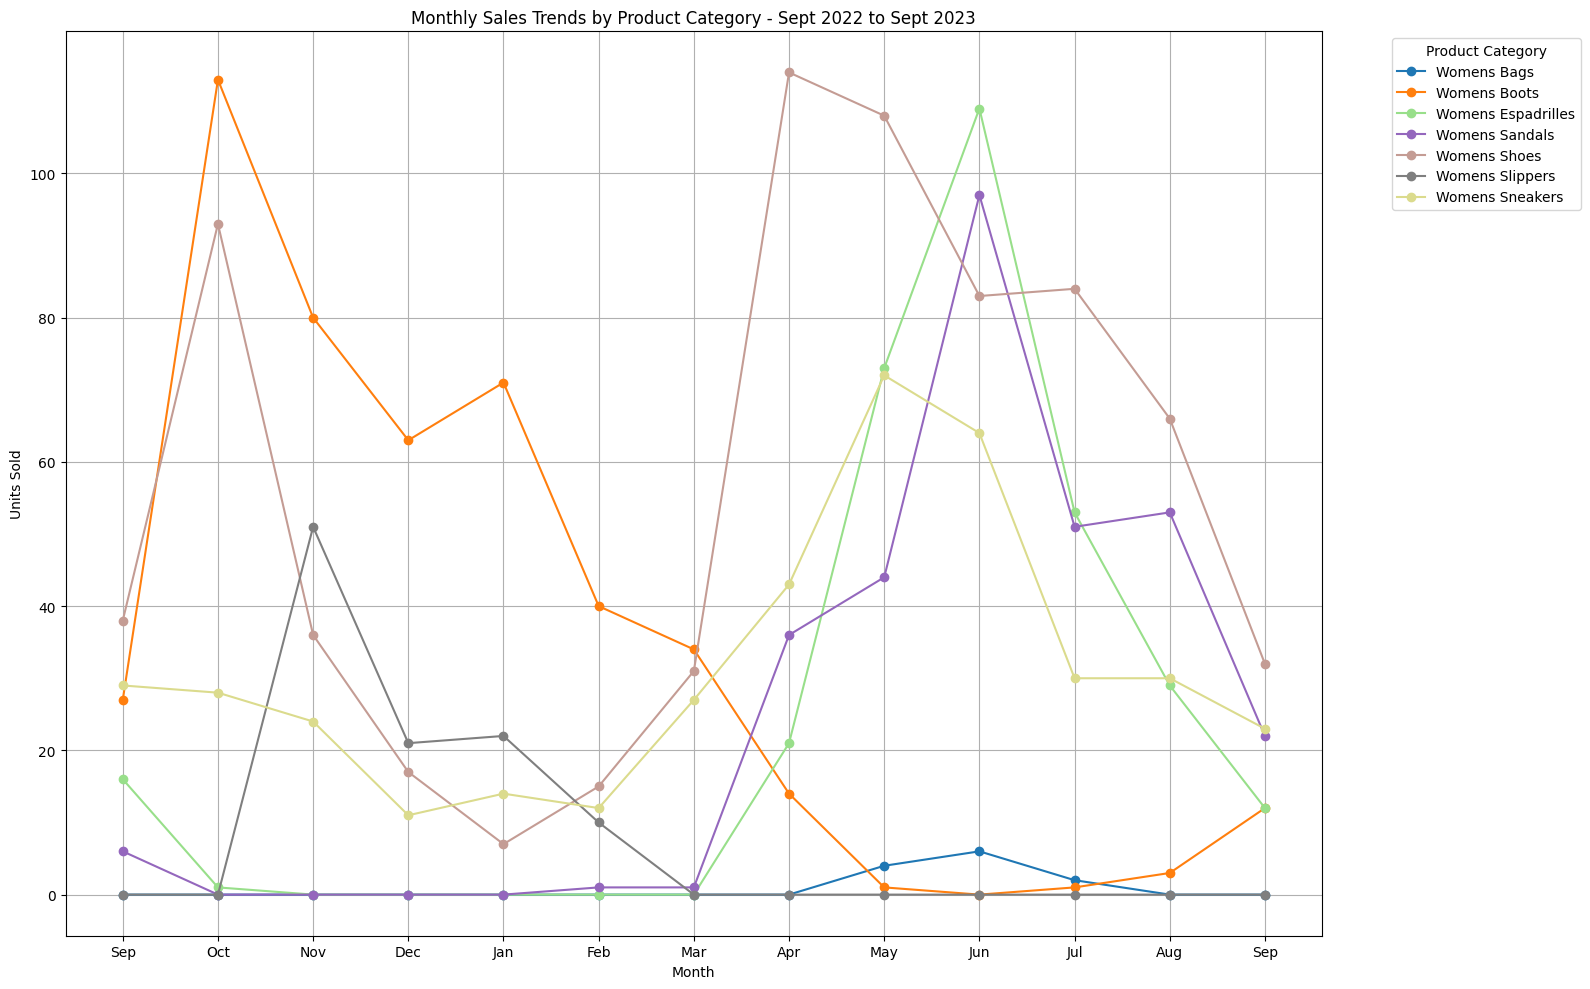

In [75]:
# Fill missing values with 0 to ensure months with no sales are represented as zero
monthly_sales_pivot_filled = monthly_sales_pivot.fillna(0)

# Generate a colormap with enough distinct colors
num_colors = len(monthly_sales_pivot.columns)
colors = plt.colormaps.get_cmap('tab20')  # Retrieve the colormap with the default number of colors

# Plotting the sales trends for each product category with adjustments
plt.figure(figsize=(16, 10))

# Plot each category with a unique color
for i, category in enumerate(monthly_sales_pivot_filled.columns):
    plt.plot(monthly_sales_pivot_filled.index.astype(str), monthly_sales_pivot_filled[category], 
             marker='o', label=category, color=colors(i / num_colors))  # Adjust the index to fit within the color map range

# Title and labels
plt.title('Monthly Sales Trends by Product Category - Sept 2022 to Sept 2023')
plt.xlabel('Month')
plt.ylabel('Units Sold')

# Customizing the x-axis to display months
plt.xticks(ticks=range(0, 13), labels=['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Let's see what each category's contribution to the total sales is for each month.

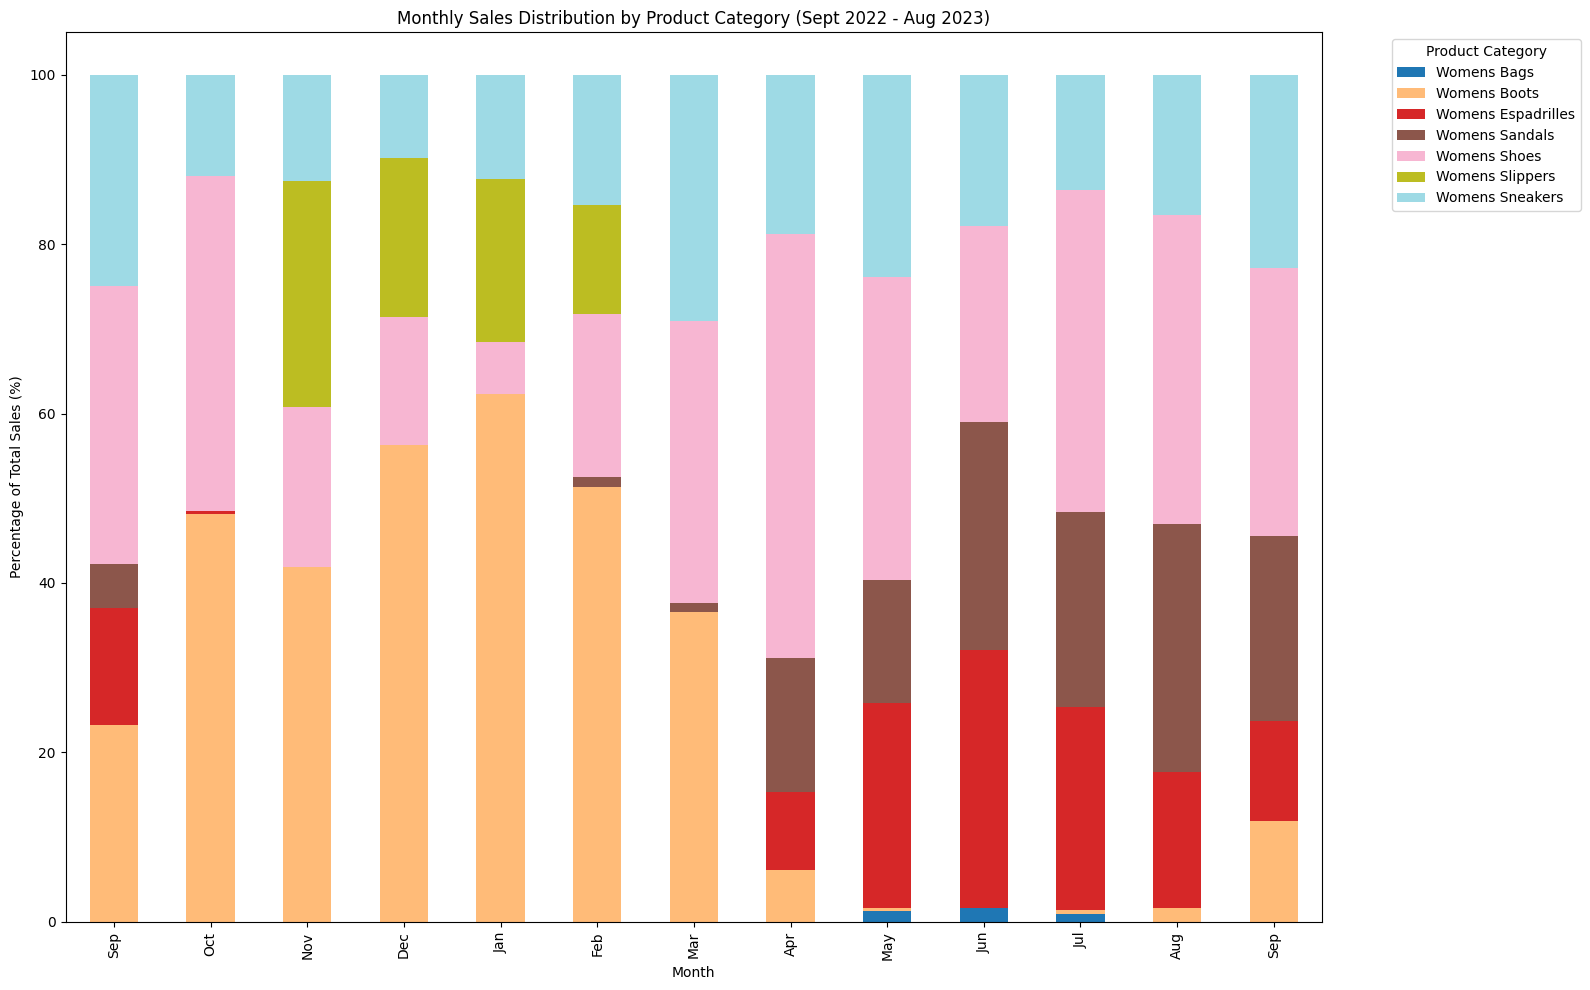

In [76]:
# Grouping the data by Year-Month and Product Category again, summing up the Units Sold for each
monthly_sales_distribution = women_categories.groupby(['Year-Month', 'Product Category'])['Units Sold'].sum().unstack().fillna(0)

# Calculate the percentage contribution of each category per month
monthly_sales_distribution_percentage = monthly_sales_distribution.div(monthly_sales_distribution.sum(axis=1), axis=0) * 100

# Plotting the sales distribution by month within each category
plt.figure(figsize=(16, 10))

# Stacked bar plot to show distribution
monthly_sales_distribution_percentage.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Formatting the plot
plt.title('Monthly Sales Distribution by Product Category (Sept 2022 - Aug 2023)')
plt.xlabel('Month')
plt.ylabel('Percentage of Total Sales (%)')
plt.xticks(ticks=range(0, 13), labels=['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


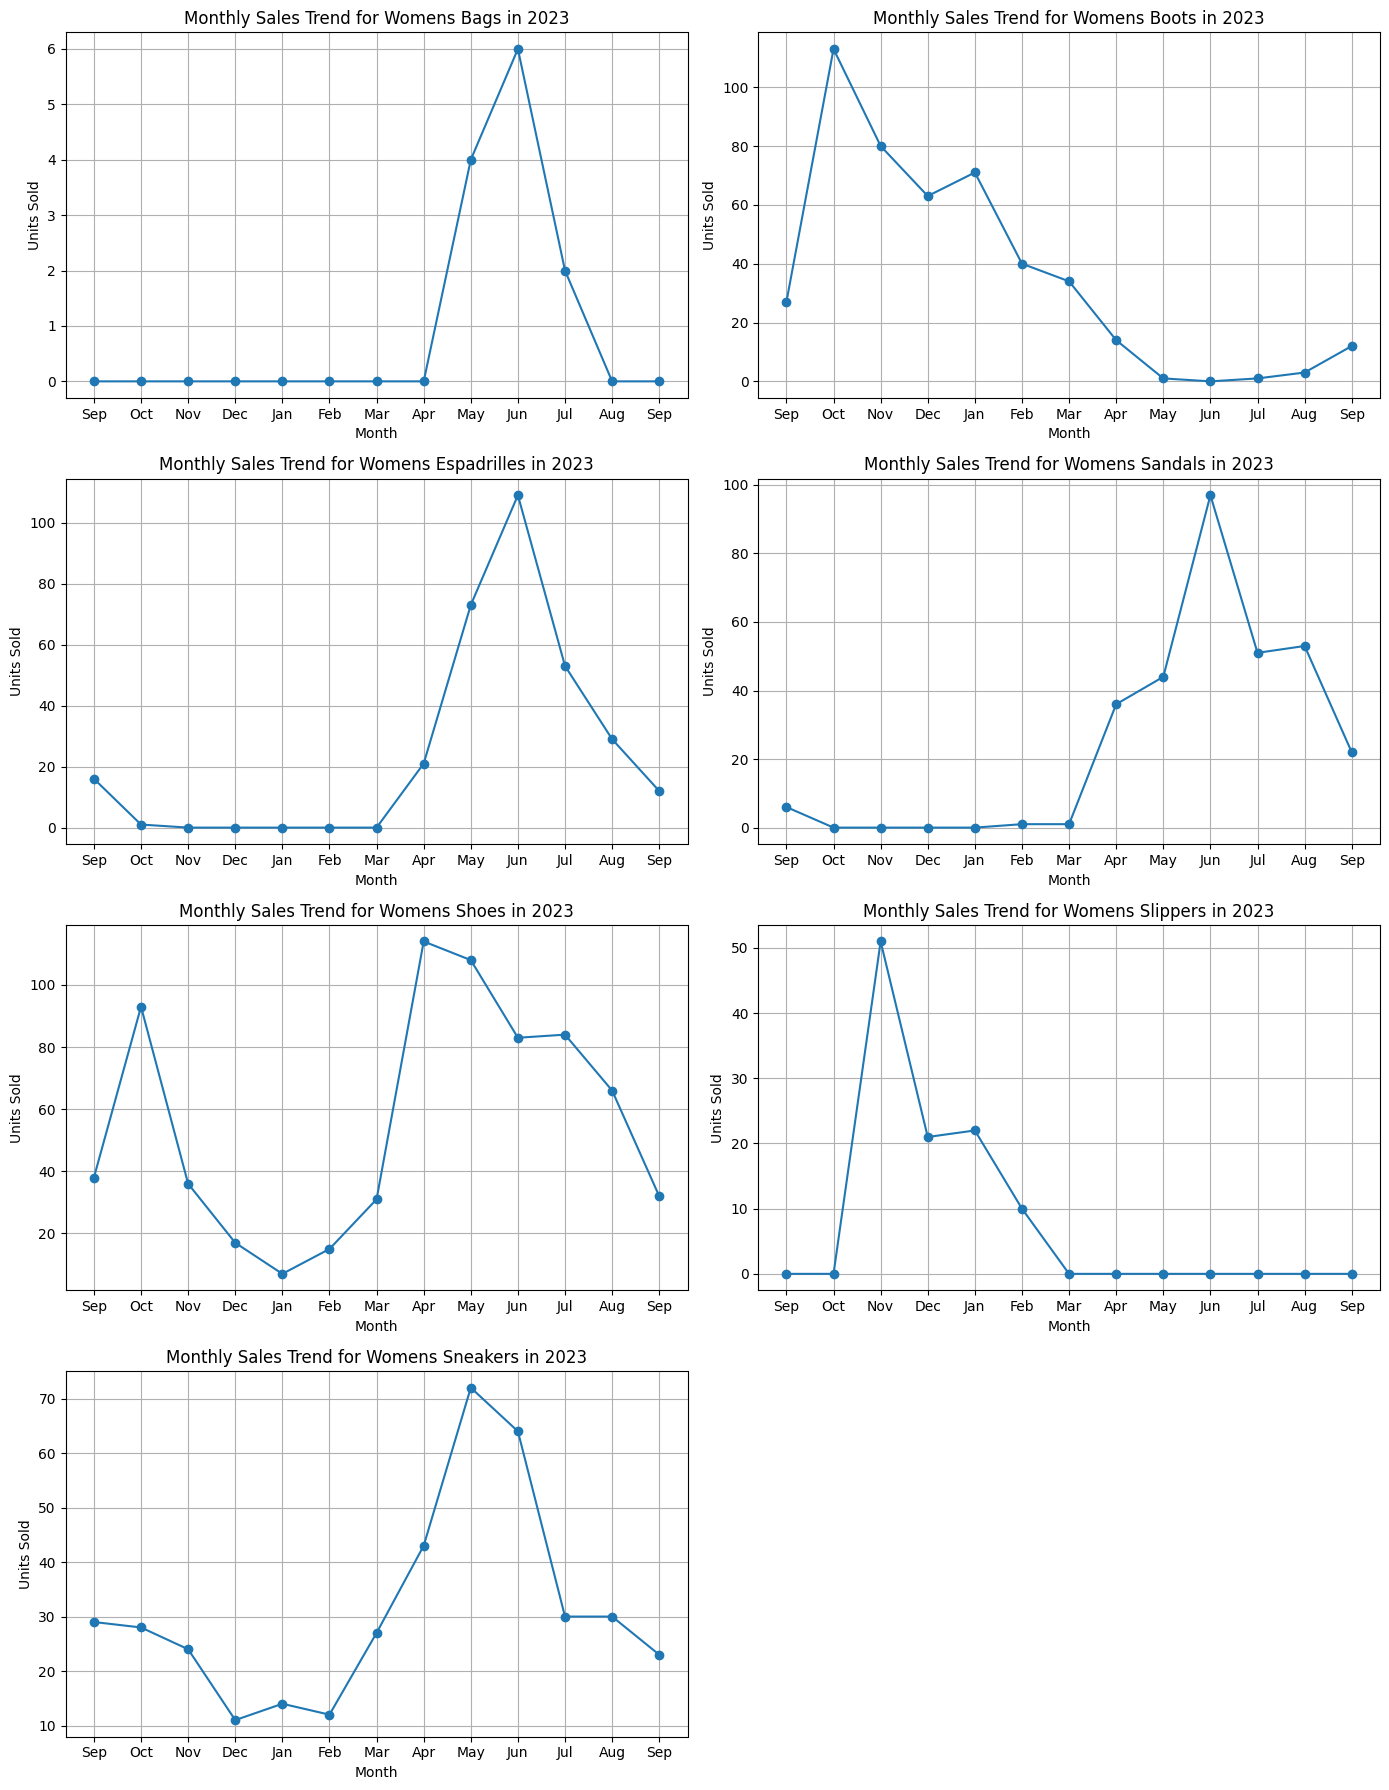

In [77]:
# Plotting individual line charts for each women's product category
categories = monthly_sales_pivot_filled.columns

plt.figure(figsize=(14, 18))
for i, category in enumerate(categories, 1):
    plt.subplot(4, 2, i)
    plt.plot(monthly_sales_pivot_filled.index.astype(str), monthly_sales_pivot_filled[category], marker='o')
    plt.title(f'Monthly Sales Trend for {category} in 2023')
    plt.xlabel('Month')
    plt.ylabel('Units Sold')
    plt.xticks(range(0, 13), ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
    plt.grid(True)

plt.tight_layout()
plt.show()


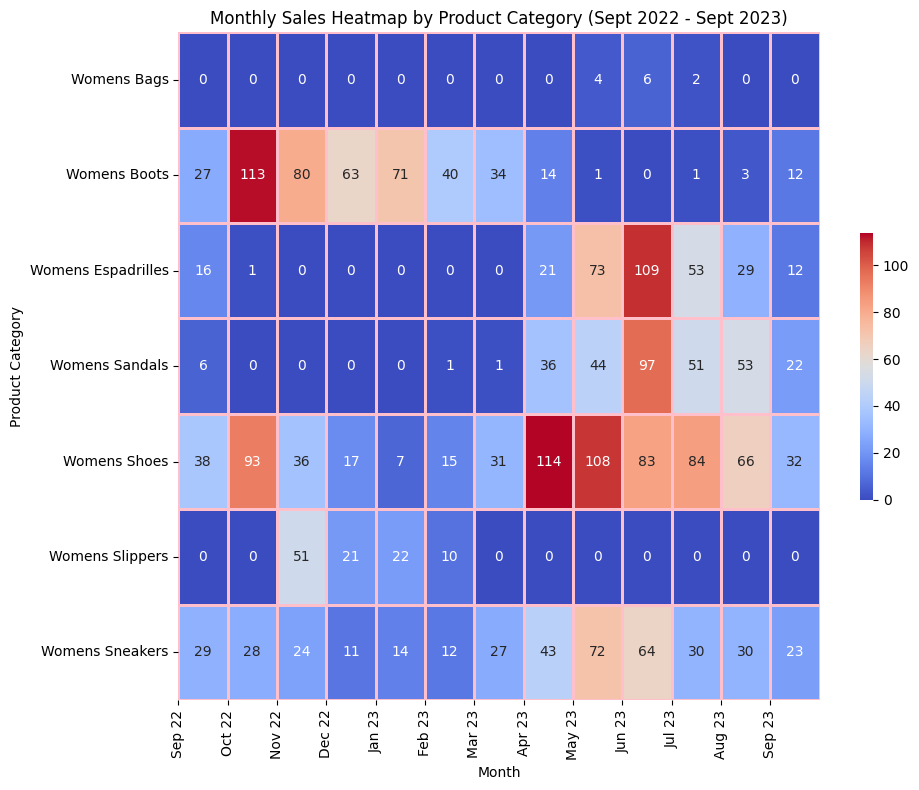

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract categories for women's products and group by Year-Month and Product Category
women_categories_sales = women_categories.groupby(['Year-Month', 'Product Category']).agg({
    'Units Sold': 'sum',
    'Revenue (incl. VAT)': 'sum'
}).reset_index()

# Pivoting the data to get categories as columns
categories_pivot = women_categories_sales.pivot(index='Year-Month', 
                                                columns='Product Category', values='Units Sold')
# Fill missing values with 0 to ensure months with no sales are represented as zero
categories_pivot_filled = categories_pivot.fillna(0)

# Set up the figure
plt.figure(figsize=(10, 8))

# Create the heatmap with the default color map and change the background color
ax = sns.heatmap(categories_pivot_filled.T, 
                 cmap='coolwarm', 
                 annot=True, 
                 fmt='.0f', 
                 linewidths=1, 
                 linecolor='pink', 
                 cbar_kws={'shrink': 0.4})

# Customize the plot background color
ax.set_facecolor('#000000')  # Black background

# Customize the plot
plt.title('Monthly Sales Heatmap by Product Category (Sept 2022 - Sept 2023)')
plt.xlabel('Month')
plt.ylabel('Product Category')

# Set x-axis ticks to represent the months from September 2022 to September 2023
plt.xticks(ticks=range(0, 13), labels=['Sep 22', 'Oct 22', 'Nov 22', 'Dec 22', 'Jan 23', 'Feb 23', 'Mar 23', 
                                       'Apr 23', 'May 23', 'Jun 23', 'Jul 23', 'Aug 23', 'Sep 23'])

plt.tight_layout()

# Display the heatmap
plt.show()


Let's concentrate on the Autumn/Winter and understand what subcategories are selling most.

In [112]:
# Filter the DataFrame for the specific season collection
filtered_df = sales_2017_2024_clean[sales_2017_2024_clean['Season Collection'] == '(2022) AW']

# Get the unique values from the 'Product Subcategory' column
unique_subcategories = filtered_df['Product Subcategory'].unique()

# Display the unique values
unique_subcategories


array(['Boys B2S (lace ups)', 'Boys B2S (velcro)', 'Leather Pumps (WDG)',
       'Suede Moccassins (MICRO)', 'Girls B2S (Mary Jane)',
       'Leather Work Boots', 'Girls B2S (lace ups)',
       'Nubuck Pumps  (LOW)', 'Gore Tex Trainers (LOW) ',
       'Suede Ankle  (MID)', 'Leather Dealer (IND)',
       'Suede Pumps (MICRO)', 'Leather Ankle  (MID)',
       'Suede Ankle  (LOW)', 'Nubuck Work Boots', 'Leather Ankle (SPT)',
       'Suede Pumps  (LOW)', 'Suede Calf  (LOW)', 'Gore Tex Ankle (WDG)',
       'Boots (girls)', 'Leather Dealer (CAS)', 'Suede Biker Boots',
       'Indoor Socks (Unisex)', 'Leather Hi Tops (LOW) ',
       'Nubuck Biker (LOW)', 'Nubuck Calf (LOW)', 'Gore Tex Calf  (LOW)',
       'Stretch Knee (WDG)', 'Suede Pumps (WDG)', 'Suede Courts (HI)',
       'Suede Courts (MID)', 'Gore Tex Hi Tops (LOW) ', 'Warm Scarves',
       'Suede Ankle (SPT)', 'Leather Loafers (LOW)',
       'Leather Ankle  (LOW)', 'Trainers (boys)', 'Flat Recycled Mules',
       'Footbed Merino Mules', 

In [116]:
ankle_subcategories = [subcategory for subcategory in unique_subcategories if 'Ankle' in subcategory]
ankle_subcategories

['Suede Ankle  (MID)',
 'Leather Ankle  (MID)',
 'Suede Ankle  (LOW)',
 'Leather Ankle (SPT)',
 'Gore Tex Ankle (WDG)',
 'Suede Ankle (SPT)',
 'Leather Ankle  (LOW)',
 'Suede Ankle  (WDG)']

In [117]:
knee_subcategoris = [subcategory for subcategory in unique_subcategories if 'Knee' in subcategory]
knee_subcategoris

['Stretch Knee (WDG)']

In [106]:
# Create a new column 'Product Group' based on the custom groupings

# Define a function to categorize subcategories into groups
def categorize_subcategory(subcategory):
    if subcategory in ['Suede Ankle  (MID)', 'Leather Ankle  (MID)', 'Suede Ankle  (LOW)', 'Leather Ankle  (LOW)', 
                       'Suede Ankle  (HI)', 'Leather Ankle (SPT)', 'Suede Ankle (SPT)', 'Nubuck Ankle  (WDG)', 
                       'Leather Ankle  (WDG)', 'Suede Ankle  (WDG)', 'Boots (Ankle) Low']:
        return 'Ankle Boots'
    elif subcategory == 'Gore Tex Ankle (WDG)':
        return 'Gore Tex Ankle Boots'
    elif subcategory in ['Leather Knee  (LOW)', 'Leather Knee (WDG)', 'Nubuck Knee (LOW)', 'Suede Knee  (LOW)', 
                         'Leather Knee  (HI)', 'Suede Knee  (HI)']:
        return 'Knee & Overknee Boots'
    elif subcategory == 'Stretch Knee (WDG)':
        return 'Stretch Knee Boots'
    elif subcategory in ['Boys B2S (velcro)', 'Girls B2S (Mary Jane)', 'Trainers (girls)', 'Girls B2S (lace ups)', 
                         'Boys B2S (lace ups)', 'Boots (girls)', 'Boots (boys)', 'Girls B2S (Loafers)']:
        return 'Boys & Girls Footwear'
    elif subcategory in ['Fabric Wallabys (CAS)', 'Suede Moccasins (CAS)', 'Leather Boat Shoes (CAS)', 
                         'Suede Derby (CAS)', 'Leather Dealer (CAS)']:
        return 'Casual Footwear'
    elif subcategory in ['Leather Pumps (MID)', 'Suede Pumps (MID)', 'Suede Pumps  (LOW)', 'Leather Pumps (WDG)', 
                         'Suede Pumps (WDG)', 'Suede Courts (HI)', 'Suede Courts (MID)']:
        return 'Formal Footwear'
    elif subcategory in ['Trainers (boys)', 'Trainers (Unisex)', 'Dressy Trainers (SPORT)', 
                         'Fabric Trainers (SPORT)', 'Gore Tex Trainers (SPORT)']:
        return 'Sports Footwear'
    else:
        return 'Others'

# Apply the function to the 'Product Subcategory' column
filtered_data['Product Group'] = filtered_data['Product Subcategory'].apply(categorize_subcategory)

# Display the first few rows to verify the new groupings
grouped_data_head = filtered_data[['Product Subcategory', 'Product Group']].head(20)

grouped_data_head


/var/folders/c_/zrm23kf90kq51s4ydyjj12n00000gn/T/ipykernel_1586/3525094194.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Product Group'] = filtered_data['Product Subcategory'].apply(categorize_subcategory)


,Product Subcategory,Product Group
13325,Boys B2S (velcro),Boys & Girls Footwear
13326,Boys B2S (velcro),Boys & Girls Footwear
13327,Boys B2S (velcro),Boys & Girls Footwear
13328,Trainers (girls),Boys & Girls Footwear
13329,Girls B2S (Mary Jane),Boys & Girls Footwear
13330,Fabric Pumps (LOW),Others
13331,LO Wedge Fabric,Others
13332,Girls B2S (Mary Jane),Boys & Girls Footwear
13333,Boys B2S (velcro),Boys & Girls Footwear
13334,Fabric Wallabys (CAS),Casual Footwear


Let's have a look at the subcategories.

#### 3.1.1 Womens Subcategories

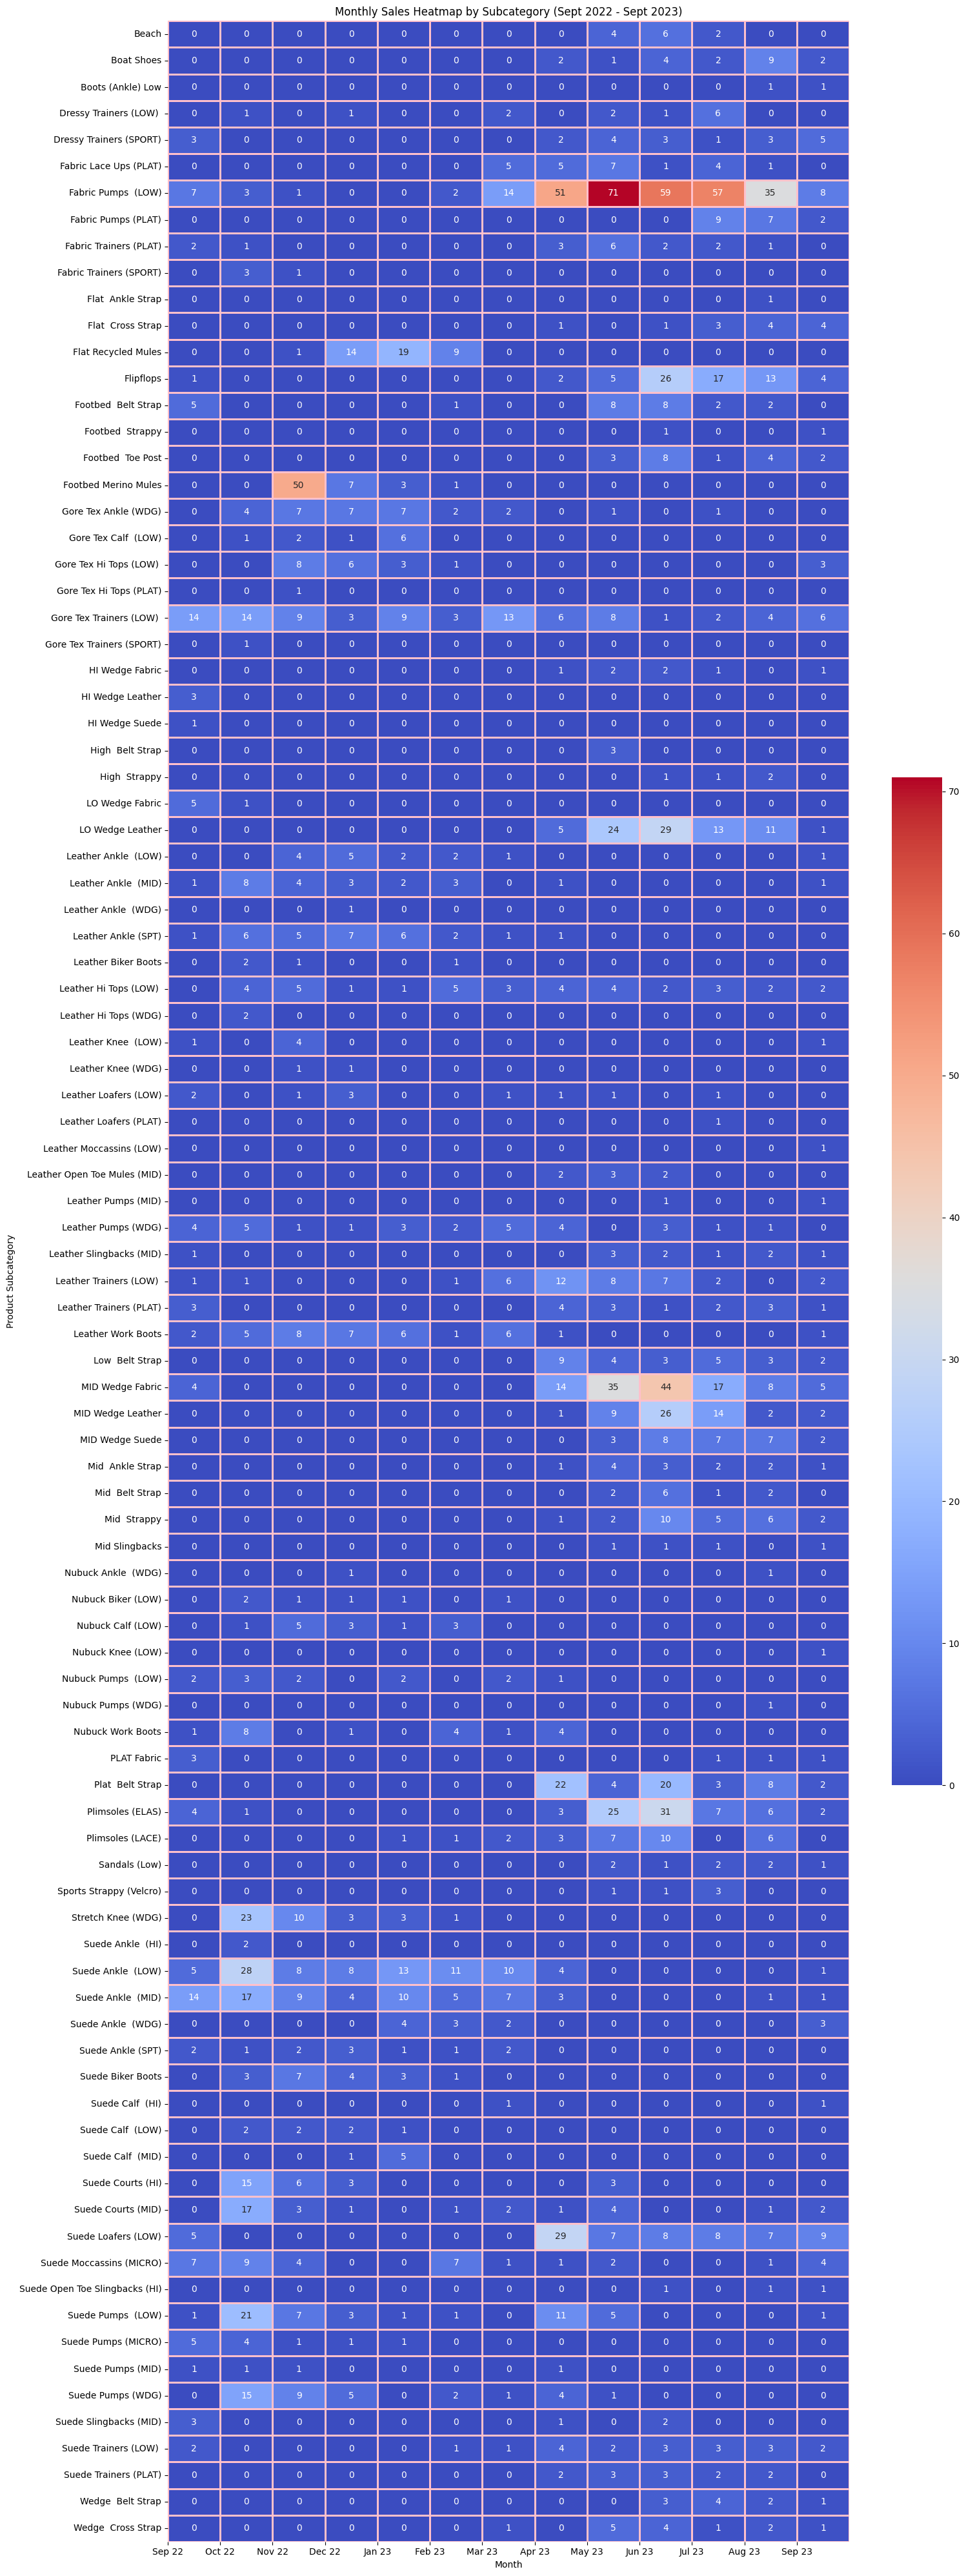

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract subcategories for women's products and group by Year-Month and Product Subcategory
women_subcategories_sales = women_categories.groupby(['Year-Month', 'Product Subcategory']).agg({
    'Units Sold': 'sum',
    'Revenue (incl. VAT)': 'sum'
}).reset_index()

# Pivoting the data to get subcategories as columns
subcategories_pivot = women_subcategories_sales.pivot(index='Year-Month', 
                                                      columns='Product Subcategory', values='Units Sold')
# Fill missing values with 0 to ensure months with no sales are represented as zero
subcategories_pivot_filled = subcategories_pivot.fillna(0)

# Set up the figure
plt.figure(figsize=(16, 40))

# Create the heatmap with the default color map and change the background color
ax = sns.heatmap(subcategories_pivot_filled.T, 
                 cmap='coolwarm', 
                 annot=True, 
                 fmt='.0f', 
                 linewidths=1, 
                 linecolor='pink', 
                 cbar_kws={'shrink': 0.4})

# Customize the plot background color
ax.set_facecolor('#000000')  # Light grey background

# Customize the plot
plt.title('Monthly Sales Heatmap by Subcategory (Sept 2022 - Sept 2023)')
plt.xlabel('Month')
plt.ylabel('Product Subcategory')

# Set x-axis ticks to represent the months from September 2022 to September 2023
plt.xticks(ticks=range(0, 13), labels=['Sep 22', 'Oct 22', 'Nov 22', 'Dec 22', 'Jan 23', 'Feb 23', 'Mar 23', 
                                       'Apr 23', 'May 23', 'Jun 23', 'Jul 23', 'Aug 23', 'Sep 23'])

plt.tight_layout()

# Display the heatmap
plt.show()


### 3.2 Mens Footwear - Trends

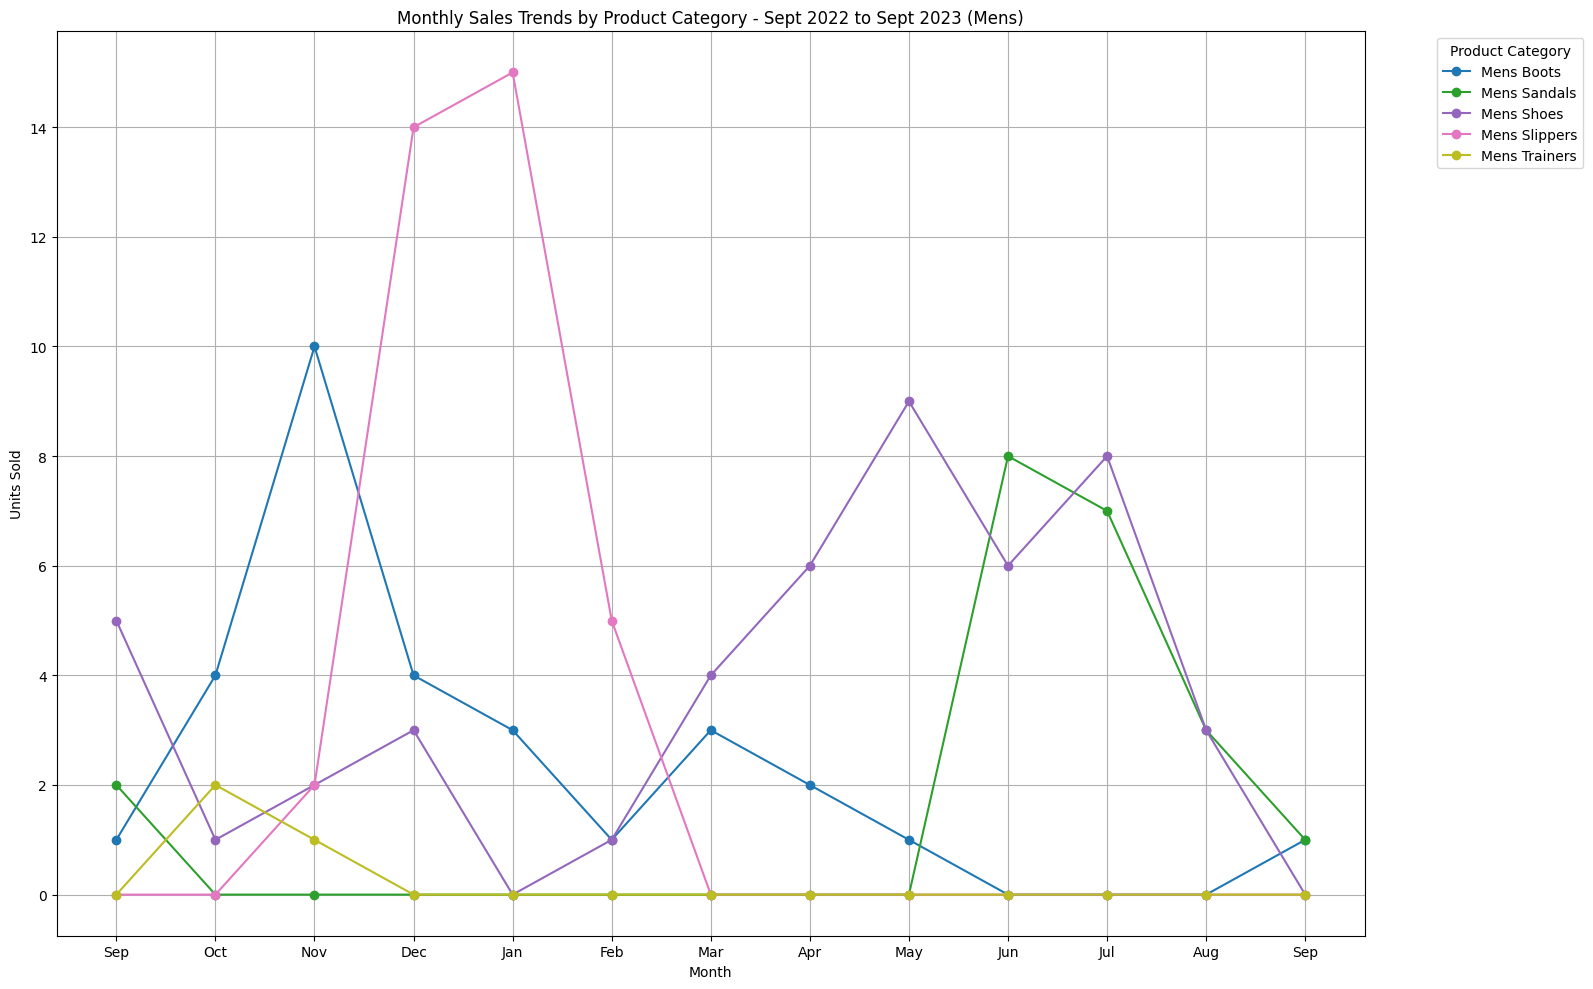

In [79]:
# Convert the 'Transaction Date' to datetime format for filtering
sales_2017_2024_clean['Transaction Date'] = pd.to_datetime(sales_2017_2024_clean['Transaction Date'], 
                                                           format='%d/%m/%Y %H:%M:%S')

# Define the date range
start_date = pd.Timestamp('2022-09-01')
end_date = pd.Timestamp('2023-09-30')

# Filter the data for the specified date range
filtered_data = sales_2017_2024_clean[
    (sales_2017_2024_clean['Transaction Date'] >= start_date) 
    & (sales_2017_2024_clean['Transaction Date'] <= end_date)]

# Focus on 'Mens' product categories, ensuring 'Mens' is a distinct word
men_categories = filtered_data[filtered_data['Product Category']
                                 .str.contains(r'\bMens\b', case=False, na=False)].copy()

# Check the unique categories within men's products
men_category_counts = men_categories['Product Category'].value_counts()

# Extracting year-month from Transaction Date for grouping
men_categories.loc[:, 'Year-Month'] = men_categories['Transaction Date'].dt.to_period('M')

# Grouping data by Year-Month and Product Category
monthly_sales = men_categories.groupby(['Year-Month', 'Product Category']).agg({
    'Units Sold': 'sum',
    'Revenue (incl. VAT)': 'sum'
}).reset_index()

# Pivoting the data to get categories as columns
monthly_sales_pivot = monthly_sales.pivot(index='Year-Month', 
                                          columns='Product Category', values='Units Sold')
# Fill missing values with 0 to ensure months with no sales are represented as zero
monthly_sales_pivot_filled = monthly_sales_pivot.fillna(0)

# Generate a colormap with enough distinct colors
num_colors = len(monthly_sales_pivot.columns)
colors = plt.colormaps.get_cmap('tab20')  # Retrieve the colormap with the default number of colors

# Plotting the sales trends for each product category with adjustments
plt.figure(figsize=(16, 10))

# Plot each category with a unique color
for i, category in enumerate(monthly_sales_pivot_filled.columns):
    plt.plot(monthly_sales_pivot_filled.index.astype(str), monthly_sales_pivot_filled[category], 
             marker='o', label=category, color=colors(i / num_colors))  # Adjust the index to fit within the color map range

# Title and labels
plt.title('Monthly Sales Trends by Product Category - Sept 2022 to Sept 2023 (Mens)')
plt.xlabel('Month')
plt.ylabel('Units Sold')

# Customizing the x-axis to display months
plt.xticks(ticks=range(0, 13), labels=['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


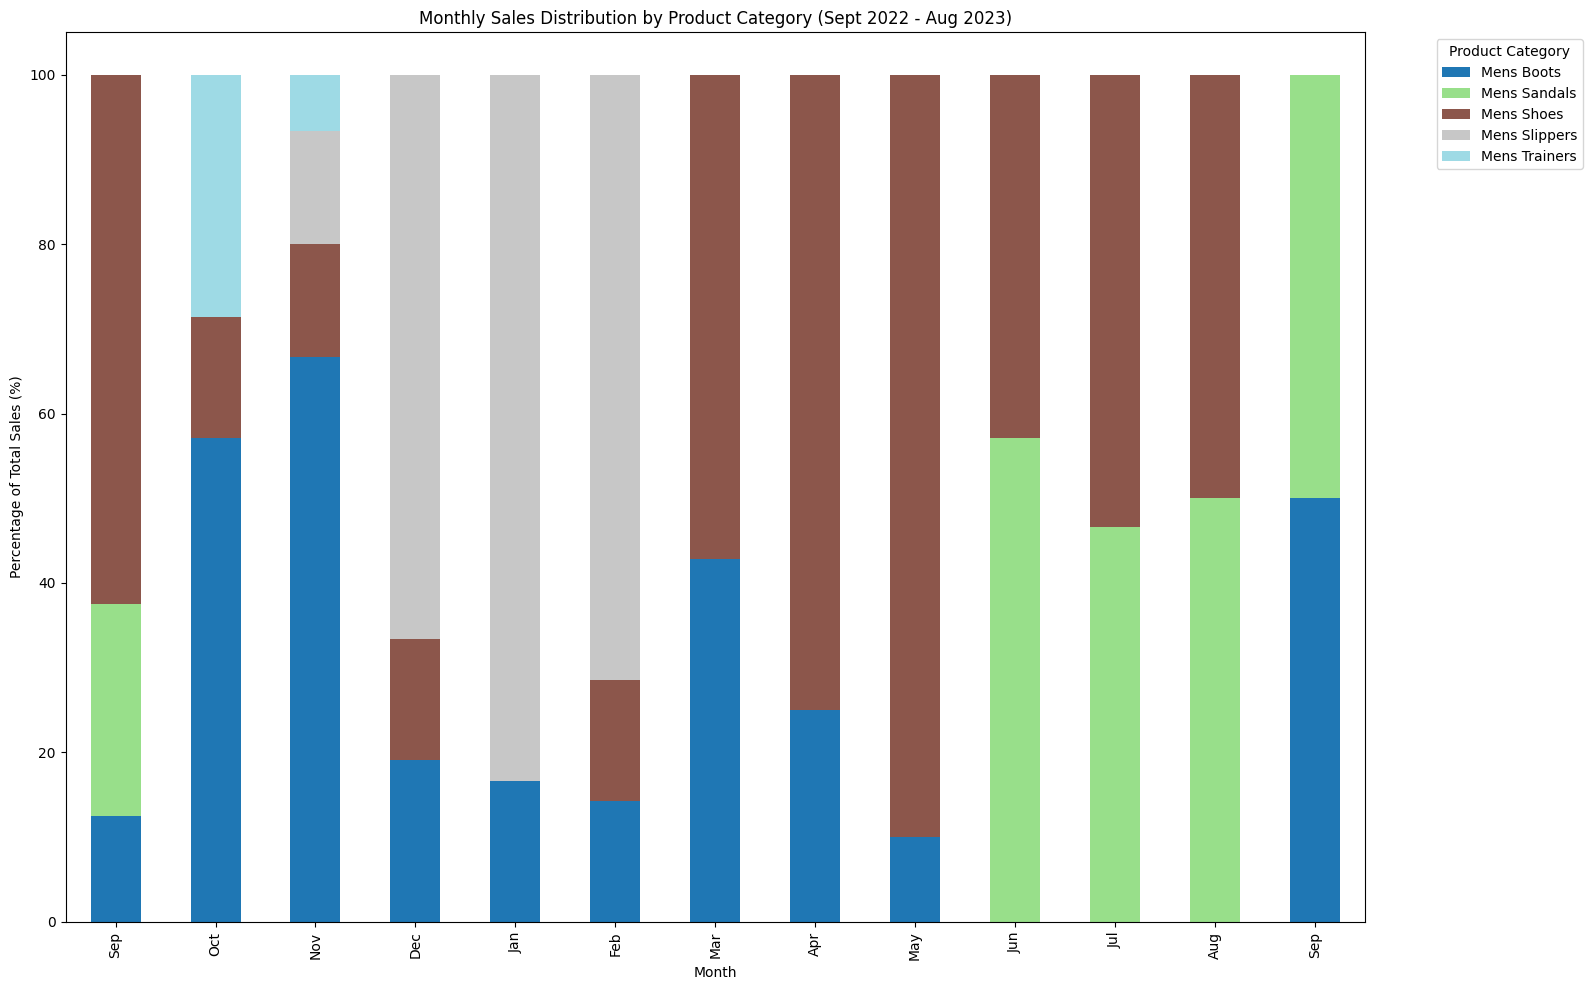

In [80]:
# Grouping the data by Year-Month and Product Category again, summing up the Units Sold for each
monthly_sales_distribution = men_categories.groupby(['Year-Month', 'Product Category'])['Units Sold'].sum().unstack().fillna(0)

# Calculate the percentage contribution of each category per month
monthly_sales_distribution_percentage = monthly_sales_distribution.div(monthly_sales_distribution.sum(axis=1), axis=0) * 100

# Plotting the sales distribution by month within each category
plt.figure(figsize=(16, 10))

# Stacked bar plot to show distribution
monthly_sales_distribution_percentage.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Formatting the plot
plt.title('Monthly Sales Distribution by Product Category (Sept 2022 - Aug 2023)')
plt.xlabel('Month')
plt.ylabel('Percentage of Total Sales (%)')
plt.xticks(ticks=range(0, 13), labels=['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

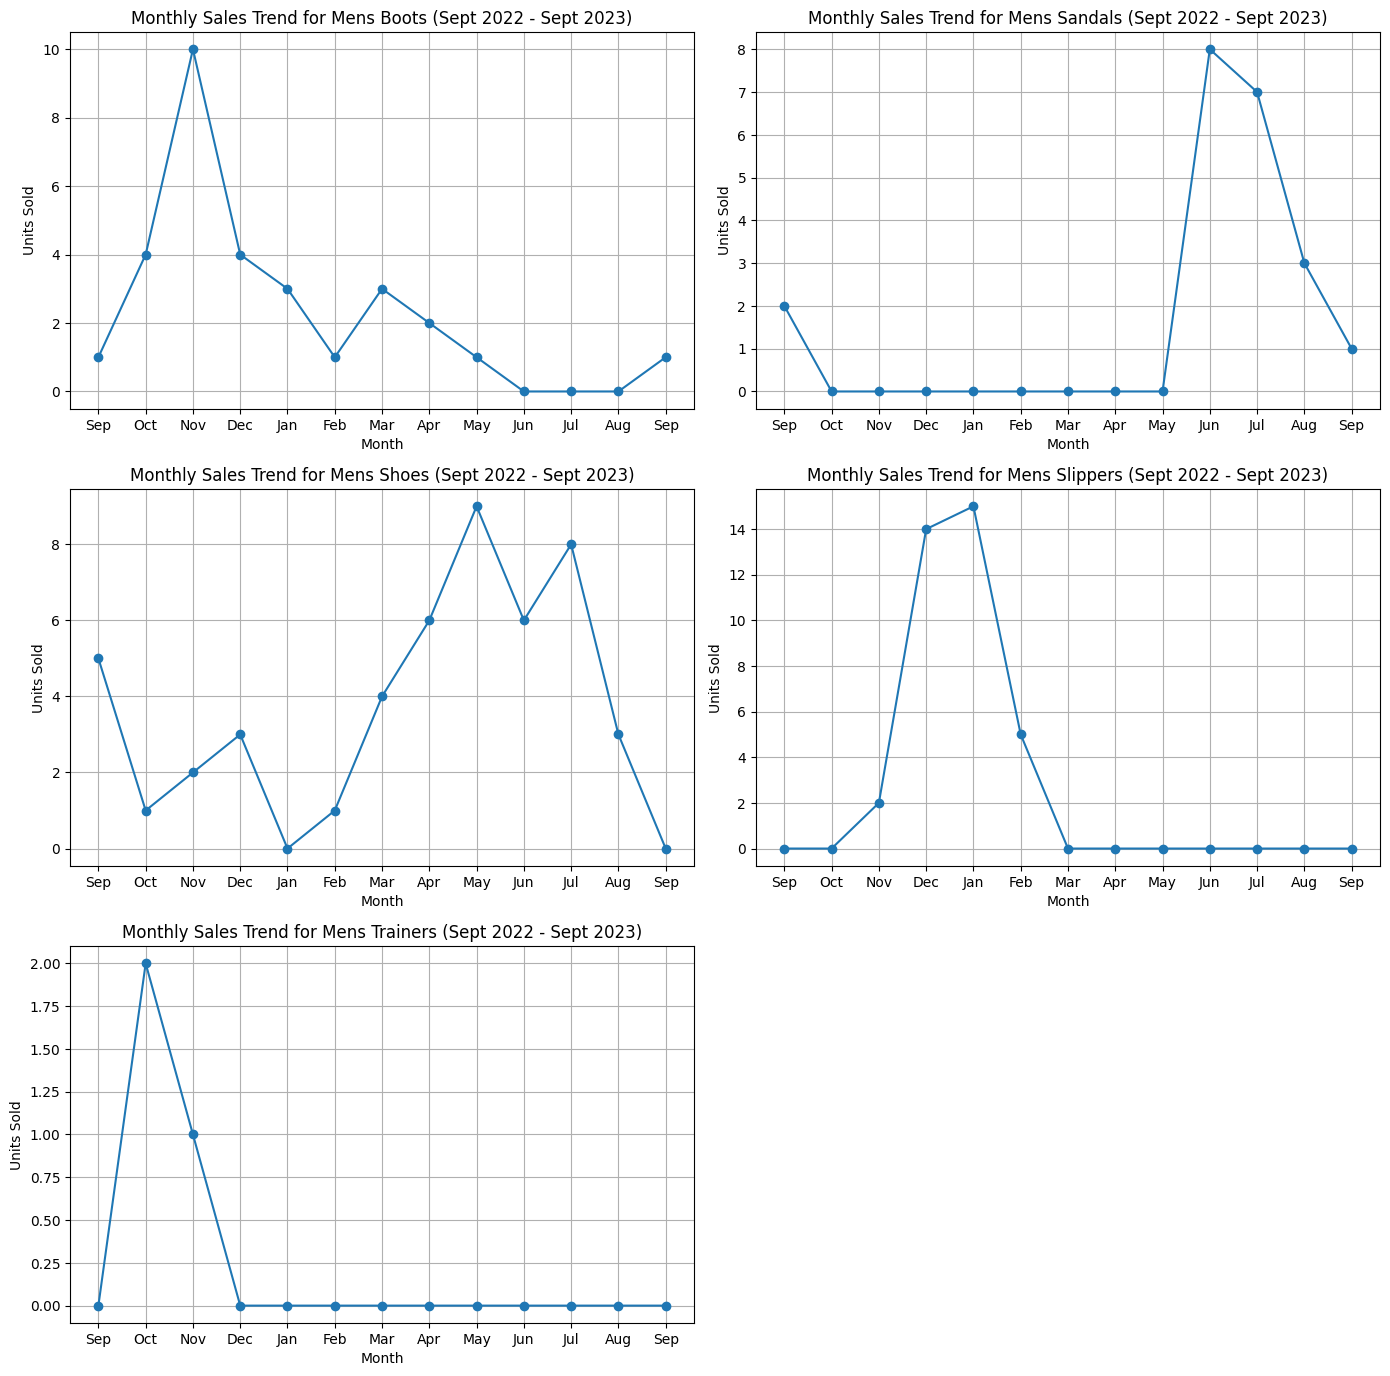

In [81]:
# Plotting individual line charts for each men's product category
categories = monthly_sales_pivot_filled.columns

plt.figure(figsize=(14, 18))
for i, category in enumerate(categories, 1):
    plt.subplot(4, 2, i)
    plt.plot(monthly_sales_pivot_filled.index.astype(str), monthly_sales_pivot_filled[category], marker='o')
    plt.title(f'Monthly Sales Trend for {category} (Sept 2022 - Sept 2023)')
    plt.xlabel('Month')
    plt.ylabel('Units Sold')
    plt.xticks(range(0, 13), ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
    plt.grid(True)

plt.tight_layout()
plt.show()

#### 3.2.1 Mens Subcategory - Trends

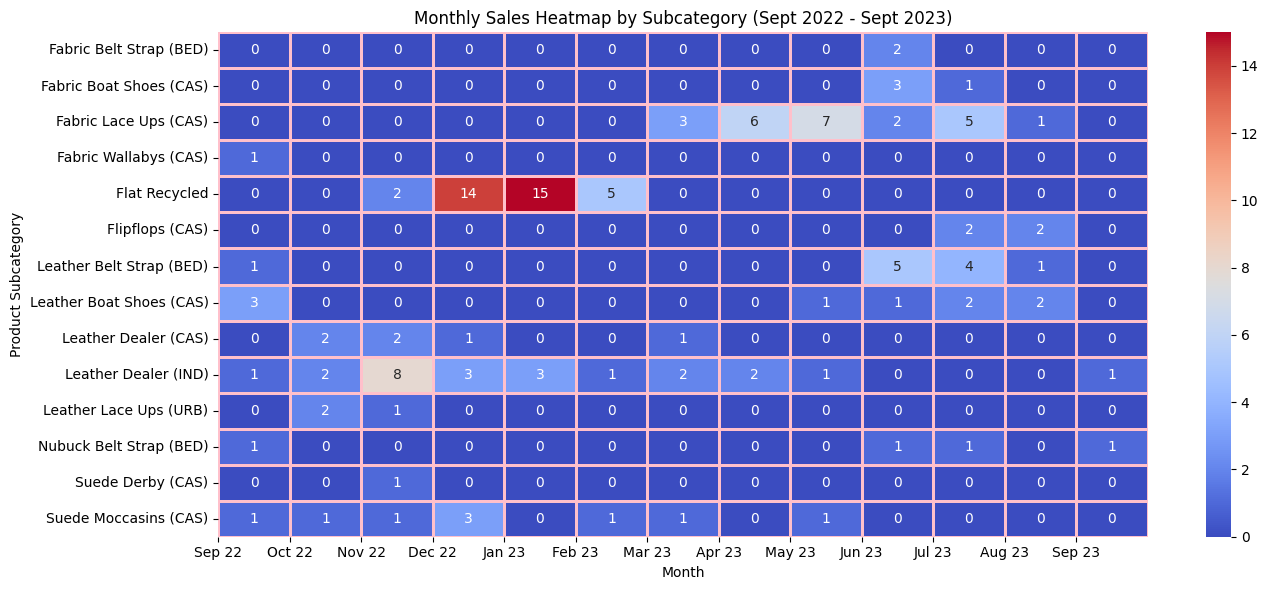

In [82]:
# Extract subcategories for men's products and group by Year-Month and Product Subcategory
men_subcategories_sales = men_categories.groupby(['Year-Month', 'Product Subcategory']).agg({
    'Units Sold': 'sum',
    'Revenue (incl. VAT)': 'sum'
}).reset_index()

# Pivoting the data to get subcategories as columns
subcategories_pivot = men_subcategories_sales.pivot(index='Year-Month', 
                                                    columns='Product Subcategory', values='Units Sold')

# Fill missing values with 0 to ensure months with no sales are represented as zero
subcategories_pivot_filled = subcategories_pivot.fillna(0)

# Set up the figure
plt.figure(figsize=(14, 6))

# Create the heatmap with the default color map and change the background color
ax = sns.heatmap(subcategories_pivot_filled.T, 
                 cmap='coolwarm', 
                 annot=True, 
                 fmt='.0f', 
                 linewidths=1, 
                 linecolor='pink', 
                 cbar_kws={'shrink': 1})

# Customize the plot background color
ax.set_facecolor('#000000')  # Black background

# Customize the plot
plt.title('Monthly Sales Heatmap by Subcategory (Sept 2022 - Sept 2023)')
plt.xlabel('Month')
plt.ylabel('Product Subcategory')

# Set x-axis ticks to represent the months from September 2022 to September 2023
plt.xticks(ticks=range(0, 13), labels=['Sep 22', 'Oct 22', 'Nov 22', 'Dec 22', 'Jan 23', 'Feb 23', 'Mar 23', 
                                       'Apr 23', 'May 23', 'Jun 23', 'Jul 23', 'Aug 23', 'Sep 23'])

plt.tight_layout()

# Display the heatmap
plt.show()

### 3.3 Boys Footwear - Trends

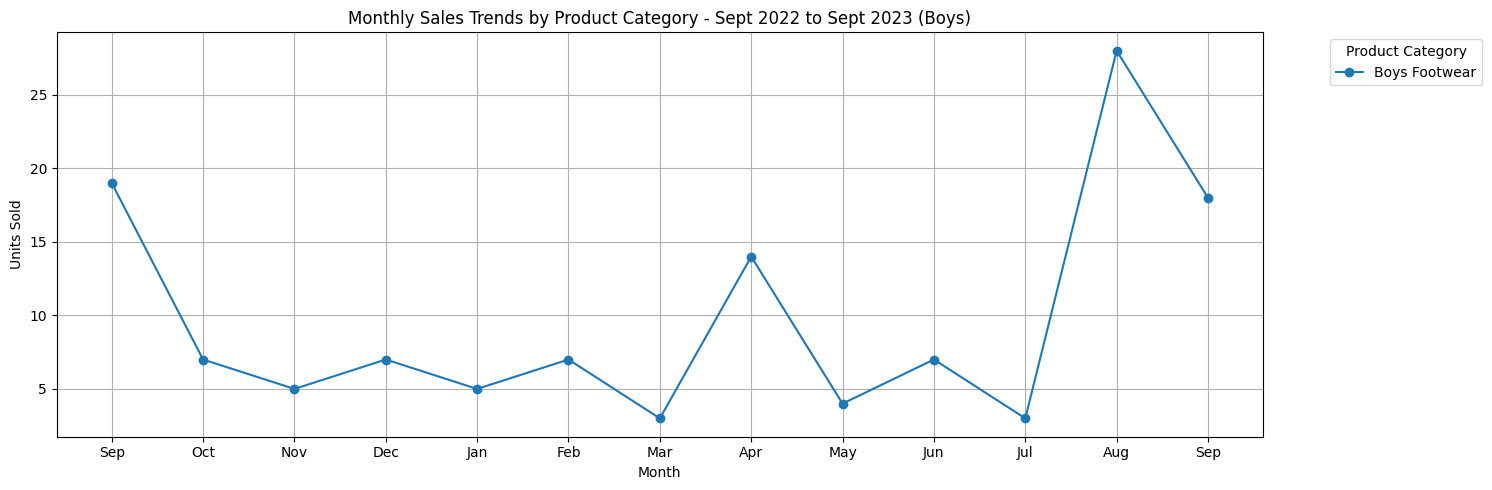

In [83]:
# Convert the 'Transaction Date' to datetime format for filtering
sales_2017_2024_clean['Transaction Date'] = pd.to_datetime(sales_2017_2024_clean['Transaction Date'], 
                                                           format='%d/%m/%Y %H:%M:%S')

# Define the date range
start_date = pd.Timestamp('2022-09-01')
end_date = pd.Timestamp('2023-09-30')

# Filter the data for the specified date range
filtered_data = sales_2017_2024_clean[
    (sales_2017_2024_clean['Transaction Date'] >= start_date) 
    & (sales_2017_2024_clean['Transaction Date'] <= end_date)]

# Focus on 'Boys' product categories, ensuring 'Boys' is a distinct word
boys_categories = filtered_data[filtered_data['Product Category']
                                 .str.contains(r'\bBoys\b', case=False, na=False)].copy()

# Check the unique categories within boys' products
boys_category_counts = boys_categories['Product Category'].value_counts()

# Extracting year-month from Transaction Date for grouping
boys_categories['Year-Month'] = boys_categories['Transaction Date'].dt.to_period('M')

# Grouping data by Year-Month and Product Category
monthly_sales = boys_categories.groupby(['Year-Month', 'Product Category']).agg({
    'Units Sold': 'sum',
    'Revenue (incl. VAT)': 'sum'
}).reset_index()

# Pivoting the data to get categories as columns
monthly_sales_pivot = monthly_sales.pivot(index='Year-Month', 
                                          columns='Product Category', values='Units Sold')

# Fill missing values with 0 to ensure months with no sales are represented as zero
monthly_sales_pivot_filled = monthly_sales_pivot.fillna(0)

# Generate a colormap with enough distinct colors
num_colors = len(monthly_sales_pivot.columns)
colors = plt.colormaps.get_cmap('tab20')  # Retrieve the colormap with the default number of colors

# Plotting the sales trends for each product category with adjustments
plt.figure(figsize=(15, 5))

# Plot each category with a unique color
for i, category in enumerate(monthly_sales_pivot_filled.columns):
    plt.plot(monthly_sales_pivot_filled.index.astype(str), monthly_sales_pivot_filled[category], 
             marker='o', label=category, color=colors(i / num_colors))  # Adjust the index to fit within the color map range

# Title and labels
plt.title('Monthly Sales Trends by Product Category - Sept 2022 to Sept 2023 (Boys)')
plt.xlabel('Month')
plt.ylabel('Units Sold')

# Customizing the x-axis to display months
plt.xticks(ticks=range(0, 13), labels=['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


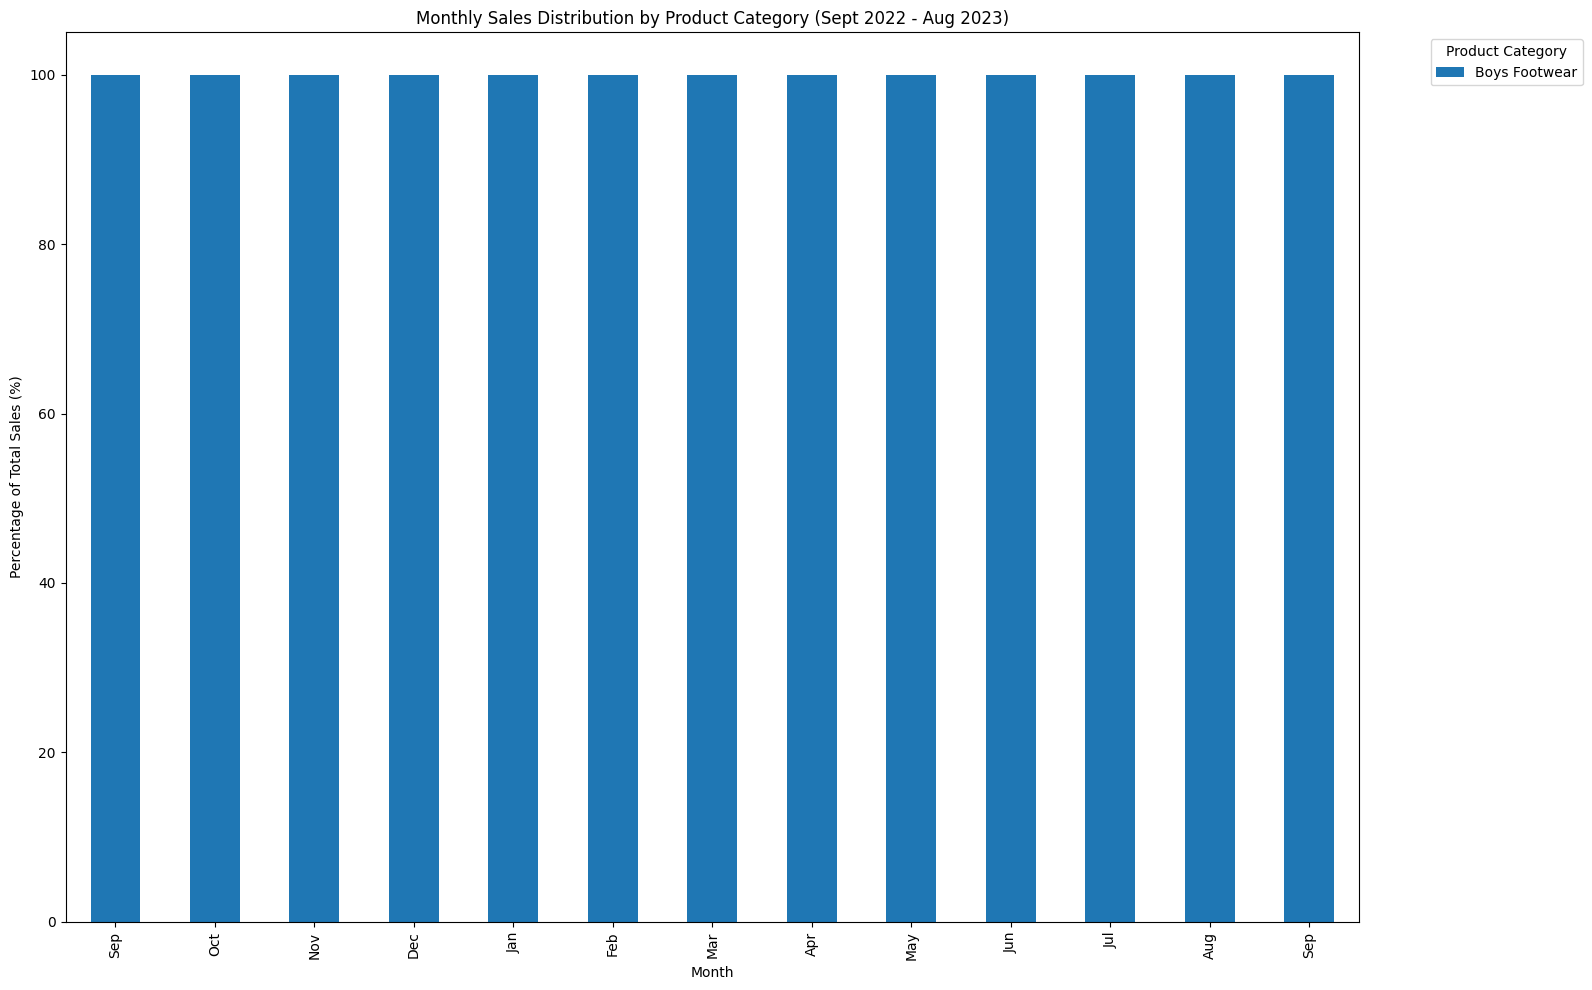

In [84]:
# Grouping the data by Year-Month and Product Category again, summing up the Units Sold for each
monthly_sales_distribution = boys_categories.groupby(['Year-Month', 'Product Category'])['Units Sold'].sum().unstack().fillna(0)

# Calculate the percentage contribution of each category per month
monthly_sales_distribution_percentage = monthly_sales_distribution.div(monthly_sales_distribution.sum(axis=1), axis=0) * 100

# Plotting the sales distribution by month within each category
plt.figure(figsize=(16, 10))

# Stacked bar plot to show distribution
monthly_sales_distribution_percentage.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Formatting the plot
plt.title('Monthly Sales Distribution by Product Category (Sept 2022 - Aug 2023)')
plt.xlabel('Month')
plt.ylabel('Percentage of Total Sales (%)')
plt.xticks(ticks=range(0, 13), labels=['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

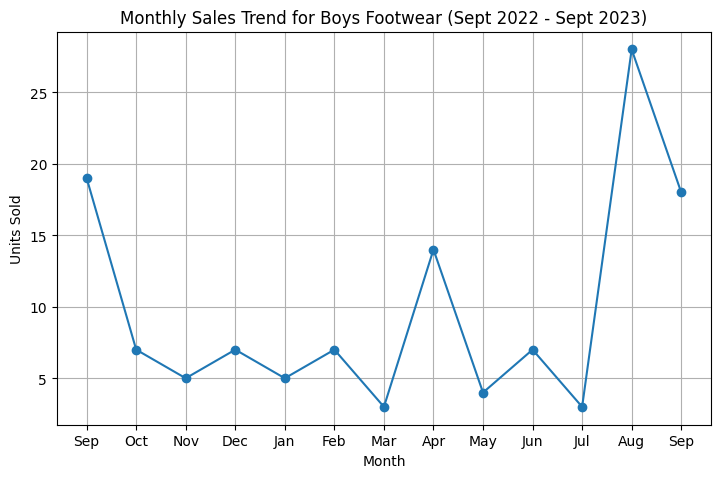

In [85]:
# Plotting individual line charts for each boys' product category
categories = monthly_sales_pivot_filled.columns

plt.figure(figsize=(14, 18))
for i, category in enumerate(categories, 1):
    plt.subplot(4, 2, i)
    plt.plot(monthly_sales_pivot_filled.index.astype(str), monthly_sales_pivot_filled[category], marker='o')
    plt.title(f'Monthly Sales Trend for {category} (Sept 2022 - Sept 2023)')
    plt.xlabel('Month')
    plt.ylabel('Units Sold')
    plt.xticks(range(0, 13), ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
    plt.grid(True)

plt.tight_layout()
plt.show()

#### 3.3.1 Boys Footwear - Subcategory

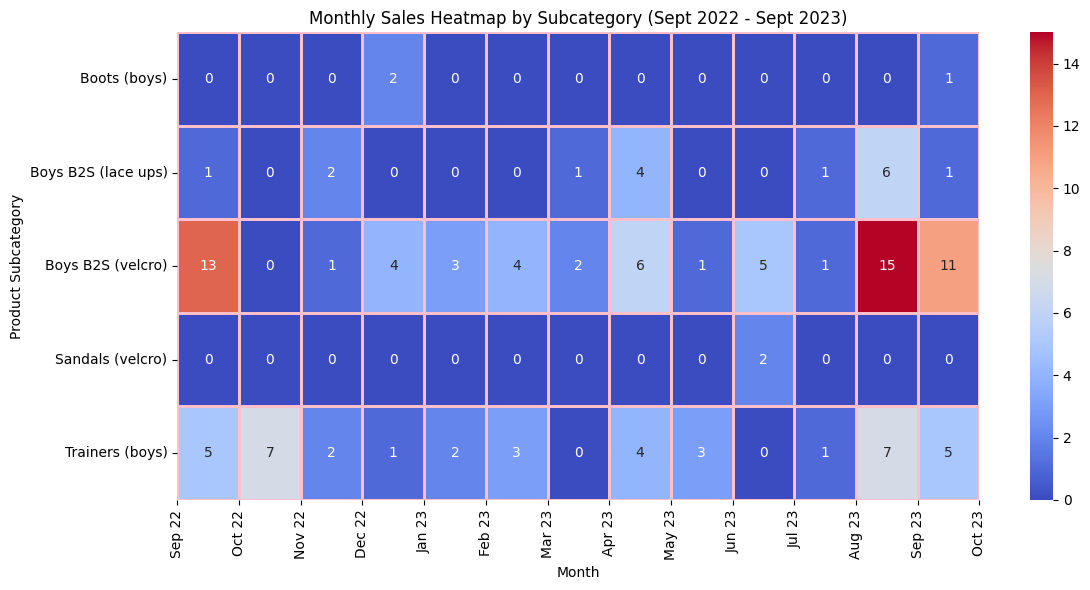

In [86]:
# Extract subcategories for boys' products and group by Year-Month and Product Subcategory
boys_subcategories_sales = boys_categories.groupby(['Year-Month', 'Product Subcategory']).agg({
    'Units Sold': 'sum',
    'Revenue (incl. VAT)': 'sum'
}).reset_index()

# Pivoting the data to get subcategories as columns
subcategories_pivot = boys_subcategories_sales.pivot(index='Year-Month', 
                                                      columns='Product Subcategory', values='Units Sold')

# Fill missing values with 0 to ensure months with no sales are represented as zero
subcategories_pivot_filled = subcategories_pivot.fillna(0)

# Set up the figure
plt.figure(figsize=(12, 6))

# Create the heatmap with the default color map and change the background color
ax = sns.heatmap(subcategories_pivot_filled.T, 
                 cmap='coolwarm', 
                 annot=True, 
                 fmt='.0f', 
                 linewidths=1, 
                 linecolor='pink', 
                 cbar_kws={'shrink': 1})

# Customize the plot background color
ax.set_facecolor('#000000')  # Black background

# Customize the plot
plt.title('Monthly Sales Heatmap by Subcategory (Sept 2022 - Sept 2023)')
plt.xlabel('Month')
plt.ylabel('Product Subcategory')

# Set x-axis ticks to represent the months from September 2022 to September 2023
plt.xticks(ticks=range(0, 14), labels=['Sep 22', 'Oct 22', 'Nov 22', 'Dec 22', 'Jan 23', 'Feb 23', 'Mar 23', 
                                       'Apr 23', 'May 23', 'Jun 23', 'Jul 23', 'Aug 23', 'Sep 23', 'Oct 23'])

plt.tight_layout()

# Display the heatmap
plt.show()

### 3.4 Girls Footwear - Trends

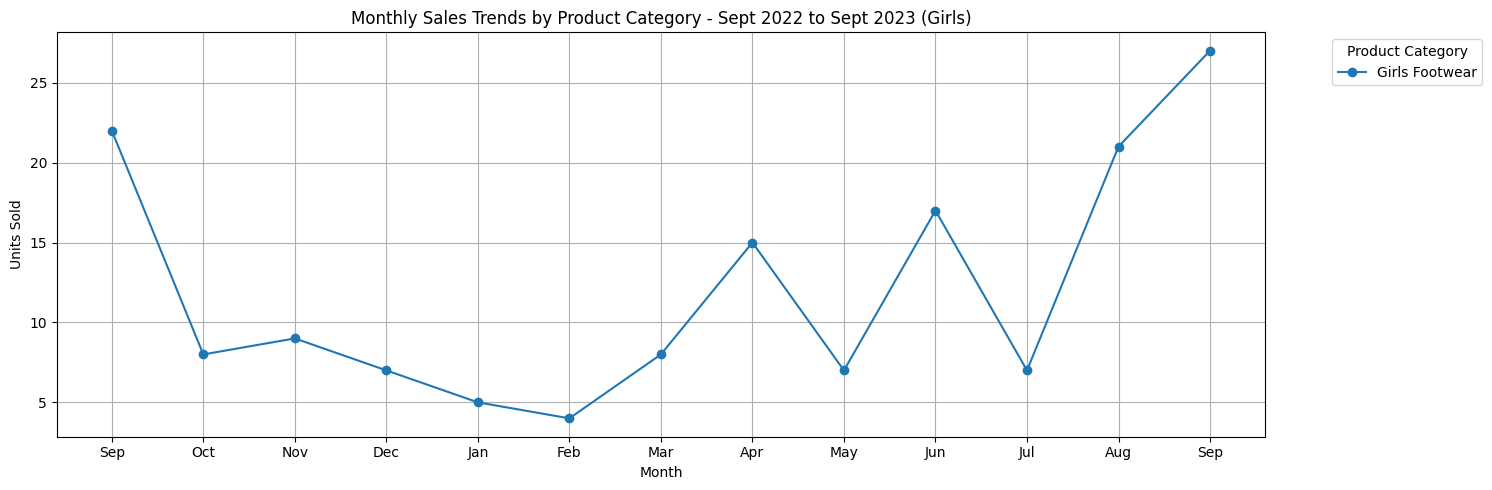

In [87]:
# Convert the 'Transaction Date' to datetime format for filtering
sales_2017_2024_clean['Transaction Date'] = pd.to_datetime(sales_2017_2024_clean['Transaction Date'], 
                                                           format='%d/%m/%Y %H:%M:%S')

# Define the date range
start_date = pd.Timestamp('2022-09-01')
end_date = pd.Timestamp('2023-09-30')

# Filter the data for the specified date range
filtered_data = sales_2017_2024_clean[
    (sales_2017_2024_clean['Transaction Date'] >= start_date) 
    & (sales_2017_2024_clean['Transaction Date'] <= end_date)]

# Focus on 'Girls' product categories, ensuring 'Girls' is a distinct word
girls_categories = filtered_data[filtered_data['Product Category']
                                 .str.contains(r'\bGirls\b', case=False, na=False)].copy()

# Check the unique categories within girls' products
girls_category_counts = girls_categories['Product Category'].value_counts()

# Extracting year-month from Transaction Date for grouping
girls_categories['Year-Month'] = girls_categories['Transaction Date'].dt.to_period('M')

# Grouping data by Year-Month and Product Category
monthly_sales = girls_categories.groupby(['Year-Month', 'Product Category']).agg({
    'Units Sold': 'sum',
    'Revenue (incl. VAT)': 'sum'
}).reset_index()

# Pivoting the data to get categories as columns
monthly_sales_pivot = monthly_sales.pivot(index='Year-Month', 
                                          columns='Product Category', values='Units Sold')

# Fill missing values with 0 to ensure months with no sales are represented as zero
monthly_sales_pivot_filled = monthly_sales_pivot.fillna(0)

# Generate a colormap with enough distinct colors
num_colors = len(monthly_sales_pivot.columns)
colors = plt.colormaps.get_cmap('tab20')  # Retrieve the colormap with the default number of colors

# Plotting the sales trends for each product category with adjustments
plt.figure(figsize=(15, 5))

# Plot each category with a unique color
for i, category in enumerate(monthly_sales_pivot_filled.columns):
    plt.plot(monthly_sales_pivot_filled.index.astype(str), monthly_sales_pivot_filled[category], 
             marker='o', label=category, color=colors(i / num_colors))  # Adjust the index to fit within the color map range

# Title and labels
plt.title('Monthly Sales Trends by Product Category - Sept 2022 to Sept 2023 (Girls)')
plt.xlabel('Month')
plt.ylabel('Units Sold')

# Customizing the x-axis to display months
plt.xticks(ticks=range(0, 13), labels=['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

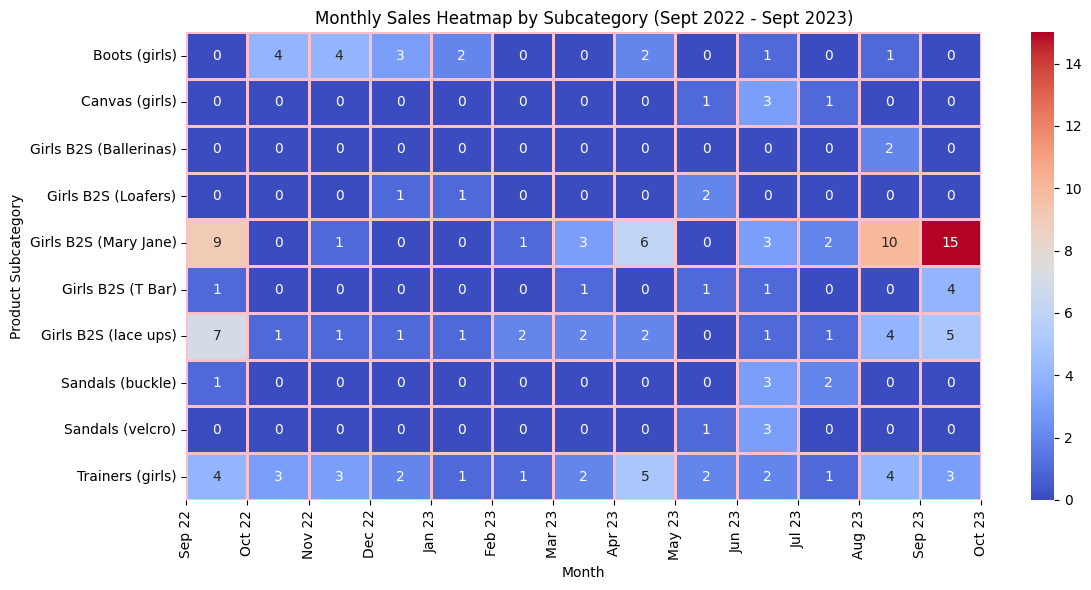

In [88]:
# Extract subcategories for boys' products and group by Year-Month and Product Subcategory
girls_subcategories_sales = girls_categories.groupby(['Year-Month', 'Product Subcategory']).agg({
    'Units Sold': 'sum',
    'Revenue (incl. VAT)': 'sum'
}).reset_index()

# Pivoting the data to get subcategories as columns
subcategories_pivot = girls_subcategories_sales.pivot(index='Year-Month', 
                                                      columns='Product Subcategory', values='Units Sold')

# Fill missing values with 0 to ensure months with no sales are represented as zero
subcategories_pivot_filled = subcategories_pivot.fillna(0)

# Set up the figure
plt.figure(figsize=(12, 6))

# Create the heatmap with the default color map and change the background color
ax = sns.heatmap(subcategories_pivot_filled.T, 
                 cmap='coolwarm', 
                 annot=True, 
                 fmt='.0f', 
                 linewidths=1, 
                 linecolor='pink', 
                 cbar_kws={'shrink': 1})

# Customize the plot background color
ax.set_facecolor('#000000')  # Black background

# Customize the plot
plt.title('Monthly Sales Heatmap by Subcategory (Sept 2022 - Sept 2023)')
plt.xlabel('Month')
plt.ylabel('Product Subcategory')

# Set x-axis ticks to represent the months from September 2022 to September 2023
plt.xticks(ticks=range(0, 14), labels=['Sep 22', 'Oct 22', 'Nov 22', 'Dec 22', 'Jan 23', 'Feb 23', 'Mar 23', 
                                       'Apr 23', 'May 23', 'Jun 23', 'Jul 23', 'Aug 23', 'Sep 23', 'Oct 23'])

plt.tight_layout()

# Display the heatmap
plt.show()